In [1]:
import pandas as pd
import numpy as numpy
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [197]:
tp104f = pd.read_csv('./Data/104_Taipei_female.csv') 
tp104m = pd.read_csv('./Data/104_Taipei_male.csv')
tp105f = pd.read_csv('./Data/105_Taipei_female.csv') 
tp105m = pd.read_csv('./Data/105_Taipei_male.csv')
tax = pd.read_csv('./Data/tax_tpe.csv') 
pop = pd.read_csv('./Data/105台北新北人口.csv')
tp_pop = pop[1033:]
print (tp104f.shape, tp104m.shape, tp105f.shape, tp105m.shape,tax.shape,tp_pop.shape)
# tp104f['village']
# tp105f['village'].value_counts()

(242, 27) (242, 27) (457, 27) (457, 27) (483, 10) (456, 209)


In [200]:
print(tp105f.site_id.value_counts())
print(tp_pop.site_id.value_counts())

臺北市大安區    53
臺北市士林區    51
臺北市文山區    43
臺北市北投區    42
臺北市中山區    42
臺北市信義區    41
臺北市內湖區    39
臺北市萬華區    36
臺北市松山區    33
臺北市中正區    31
臺北市大同區    25
臺北市南港區    20
區域別        1
Name: site_id, dtype: int64
臺北市大安區    53
臺北市士林區    51
臺北市文山區    43
臺北市北投區    42
臺北市中山區    42
臺北市信義區    41
臺北市內湖區    39
臺北市萬華區    36
臺北市松山區    33
臺北市中正區    31
臺北市大同區    25
臺北市南港區    20
Name: site_id, dtype: int64


In [189]:
# newtax = tax.drop([tax.村里 == '其　他'])
newtax = tax[tax.村里 != '其　他']
newtax = newtax[newtax.村里 != '合　計']
newtax.columns

Index(['鄉鎮市區', '村里', '納稅單位', '綜合所得總額', '平均數', '中位數', '第一分位數', '第三分位數', '標準差',
       '變異係數'],
      dtype='object')

In [171]:
print(tax.鄉鎮市區.value_counts())
print(tp105f.site_id.value_counts())

大安區    55
士林區    53
文山區    45
北投區    44
中山區    44
信義區    43
內湖區    41
萬華區    38
松山區    35
中正區    33
大同區    28
南港區    22
其　他     1
Name: 鄉鎮市區, dtype: int64
臺北市大安區    53
臺北市士林區    51
臺北市文山區    43
臺北市北投區    42
臺北市中山區    42
臺北市信義區    41
臺北市內湖區    39
臺北市萬華區    36
臺北市松山區    33
臺北市中正區    31
臺北市大同區    25
臺北市南港區    20
區域別        1
Name: site_id, dtype: int64


In [45]:
cols = ['流水号', '处理人', '处理时间']
data = [[10000, '张三', '2016-10-01'],
        [10000, '李四', '2016-10-02'],
        [10001, '王五', '2016-10-01'],
        [10002, '赵六', '2016-10-03'],
        [10001, '黄七', '2016-10-02'],
        [10000, '吴八', '2016-10-03']]
frame = pd.DataFrame(data,columns=cols)

def combination(names):
    return ','.join(names)
    
frame.groupby('流水号').aggregate(combination)


,处理人,处理时间
流水号,,
10000,"张三,李四,吴八","2016-10-01,2016-10-02,2016-10-03"
10001,"王五,黄七","2016-10-01,2016-10-02"
10002,赵六,2016-10-03


In [65]:
gb_tp105f = tp105f
gb_tp105f['site_id'].value_counts()

gb_tp105f = gb_tp105f.groupby('site_id').aggregate('sum')


In [77]:
tp105f[0:1]

,statistic_yyy,site_id,village,edu_age_15up_total,edu_doctor_graduated_f,edu_doctor_ungraduated_f,edu_master_graduated_f,edu_master_ungraduated_f,edu_university_graduated_f,edu_university_ungraduated_f,...,edu_seniorvocational_graduated_f,edu_seniorvocational_ungraduated_f,edu_junior_graduated_f,edu_junior_ungraduated_f,edu_juniorvocational_graduated_f,edu_juniorvocational_ungraduated_f,edu_primary_graduated_f,edu_primary_ungraduated_f,edu_selftaughtl_f,edu_illiterate_f
0,統計年,區域別,村里名稱,總計,博畢_女,博肄_女,碩畢_女,碩肄_女,大畢_女,大肄_女,...,職畢_女,職肄_女,國畢_女,國肄_女,初畢_女,初肄_女,小畢_女,小肄_女,自修_女,不識_女


In [111]:
# simple_h_tp105f.head()
little_school_tp105f =  tp105f[['site_id', 'village','edu_primary_graduated_f','edu_junior_graduated_f']]
selfteach_tp105f = tp105f[['site_id', 'village','edu_selftaughtl_f']]

In [153]:
simple_h_tp105f = tp105f[['site_id', 'village','edu_doctor_graduated_f','edu_master_graduated_f','edu_university_graduated_f','edu_senior_graduated_f','edu_junior_graduated_f']]
simple_h_tp105f = simple_h_tp105f[1:]
simple_h_tp105f = simple_h_tp105f[['edu_doctor_graduated_f','edu_master_graduated_f','edu_university_graduated_f','edu_senior_graduated_f','edu_junior_graduated_f']].astype(float)


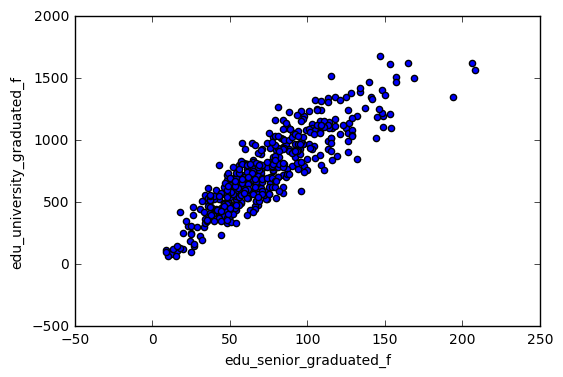

In [148]:
simple_h_tp105f.plot.scatter(x='edu_senior_graduated_f',y='edu_university_graduated_f')

In [ ]:
import matplotlib.pyplot as plt

# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Prints: [8.0, 6.0]
print "Current size:", fig_size

# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size


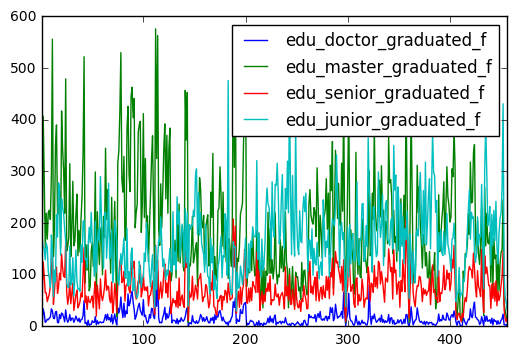

In [155]:
simple_h_tp105f = simple_h_tp105f[['edu_doctor_graduated_f','edu_master_graduated_f','edu_senior_graduated_f','edu_junior_graduated_f']].astype(float)

simple_h_tp105f.plot.line()

In [ ]:
simple_h_tp105f.plot.scatter(x='edu_senior_graduated_f',y='edu_university_graduated_f')

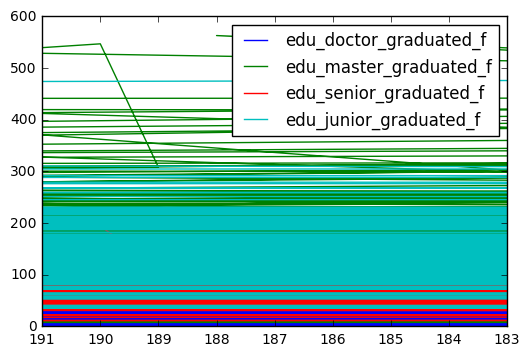

In [160]:
simple_h_tp105f = simple_h_tp105f.sort_values(by=['edu_junior_graduated_f']) #照男生的排序
simple_h_tp105f.plot.line()


In [149]:
selfteach_tp105f[1:].edu_selftaughtl_f.astype(float).describe()

count    456.000000
mean       8.000000
std        4.999341
min        0.000000
25%        4.000000
50%        7.000000
75%       11.000000
max       32.000000
Name: edu_selftaughtl_f, dtype: float64

In [151]:
tp105m["site_id"]
#各區有幾個里

0         區域別
1      臺北市松山區
2      臺北市松山區
3      臺北市松山區
4      臺北市松山區
5      臺北市松山區
6      臺北市松山區
7      臺北市松山區
8      臺北市松山區
9      臺北市松山區
10     臺北市松山區
11     臺北市松山區
12     臺北市松山區
13     臺北市松山區
14     臺北市松山區
15     臺北市松山區
16     臺北市松山區
17     臺北市松山區
18     臺北市松山區
19     臺北市松山區
20     臺北市松山區
21     臺北市松山區
22     臺北市松山區
23     臺北市松山區
24     臺北市松山區
25     臺北市松山區
26     臺北市松山區
27     臺北市松山區
28     臺北市松山區
29     臺北市松山區
        ...  
427    臺北市北投區
428    臺北市北投區
429    臺北市北投區
430    臺北市北投區
431    臺北市北投區
432    臺北市北投區
433    臺北市北投區
434    臺北市北投區
435    臺北市北投區
436    臺北市北投區
437    臺北市北投區
438    臺北市北投區
439    臺北市北投區
440    臺北市北投區
441    臺北市北投區
442    臺北市北投區
443    臺北市北投區
444    臺北市北投區
445    臺北市北投區
446    臺北市北投區
447    臺北市北投區
448    臺北市北投區
449    臺北市北投區
450    臺北市北投區
451    臺北市北投區
452    臺北市北投區
453    臺北市北投區
454    臺北市北投區
455    臺北市北投區
456    臺北市北投區
Name: site_id, dtype: object

In [9]:
tp104f.iloc[1:5,0:4]
# tp104f_gradratio = 

,statistic_yyy,site_id,village,edu_age_15up_total
1,104,臺北市松山區,莊敬里,4977
2,104,臺北市松山區,東榮里,7114
3,104,臺北市松山區,三民里,6193
4,104,臺北市松山區,新益里,4307
